# PIL

Hands-on Pillow (Python Imaging Library)

## Overview

Masks are geometric filters on an image. For instance, if we want to extract a region of an image, we may do it by multiplying the matrix of the original image by a matrix of equal size containing `1's` in the region we want to keep and `0's` otherwise.  

In this exercise we extract a circular region of the image `lena_gray_512.tif` of radius `R=150`.

## Libraries and Modules

In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

## Image Processsing

Read the image.

In [2]:
image = Image.open(Path("./assets/lena_gray_512.tif"))

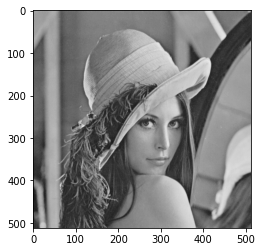

In [3]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

Print the format, size and mode.

In [4]:
print(image.format, image.size, image.mode)

TIFF (512, 512) L


Convert it to double.

In [5]:
image = np.array(image, dtype=float)

Create a matrix of the same dimensions filled with zeros.  

>**Hint:**  
`a.shape[0]` is the number of rows of a and `a.shape[1]` the number of columns.

In [6]:
width = image.shape[0]
height = image.shape[1]

In [7]:
mask_zeros = np.zeros(shape=(width,height),dtype=float)

Modify the above matrix to contain `1′s` in a circle of radius `150`, i.e. 

$
\begin{align}
&\mathbf{if} \;  (i-c_x)^2\; + \; (j-c_y)^2 \; < \; R^2 : \\
& \;\;\;\; mask[i,j]  = 1 \\
&\mathbf{else}: \\
& \;\;\;\;mask[i,j] = 0
\end{align}
$

In [8]:
c_x = width//2
c_y = height//2
R = 150

In [9]:
print(f"Center of the image\n  c_x: {c_x}\n  c_y: {c_y}")

Center of the image
  c_x: 256
  c_y: 256


In [10]:
mask_zeros_ones = mask_zeros

In [11]:
for i in range(width):
    for j in range(height):
        if (i-c_x)**2 + (j-c_y)**2 < R**2:
            mask_zeros_ones[i,j] = 1

Multiply the image by the mask (they are matrices!)

In [12]:
final_image = Image.fromarray(np.multiply(image,mask_zeros_ones))

Show the result

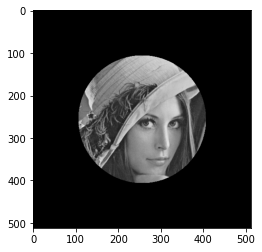

In [13]:
plt.imshow(final_image, cmap='gray', vmin=0, vmax=255)
plt.show()

When multiplying by zero, you set to black the pixels out of the circle. Modify the program to make visible those pixels with half the intensity. i.e.

$
\begin{align}
&\mathbf{if} \;  (i-c_x)^2\; + \; (j-c_y)^2 \; < \; R^2 : \\
& \;\;\;\; mask[i,j]  = 1 \\
&\mathbf{else}: \\
& \;\;\;\;mask[i,j] = 0.5
\end{align}
$

In [14]:
mask_zeros_ones = mask_zeros

In [15]:
for i in range(width):
    for j in range(height):
        if (i-c_x)**2 + (j-c_y)**2 < R**2:
            mask_zeros_ones[i,j] = 1
        else:
            mask_zeros_ones[i,j] = 0.5

In [16]:
final_image = Image.fromarray(np.multiply(image,mask_zeros_ones))

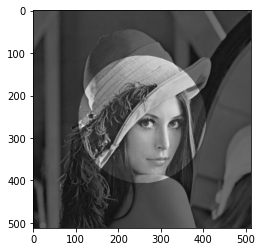

In [17]:
plt.imshow(final_image, cmap='gray', vmin=0, vmax=255)
plt.show()